In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

All of these following questions may need a preliminary analysis of the data, feel free to present answers and justifications in your own order and structure your report as it should be for a scientific report.

1. Choose a firstname and analyse its frequency along time. Compare several firstnames frequency
2. Establish by gender the most given firstname by year. Analyse the evolution of the most frequent firstname.
3. Optional : Which department has a larger variety of names along time ? Is there some sort of geographical correlation with the data?

In [2]:
df = pd.read_csv('dpt2021.csv', sep=";")

In [3]:
df.loc[(df['annais'] == '1900') & (df['sexe'] == 1)].drop(columns=['nombre'])

,sexe,preusuel,annais,dpt
0,1,_PRENOMS_RARES,1900,02
1,1,_PRENOMS_RARES,1900,04
2,1,_PRENOMS_RARES,1900,05
3,1,_PRENOMS_RARES,1900,06
4,1,_PRENOMS_RARES,1900,07
...,...,...,...,...
1749399,1,YVON,1900,75
1756869,1,ZEPHIR,1900,02
1756910,1,ZEPHIRIN,1900,12
1756911,1,ZEPHIRIN,1900,972


## Choose a firstname and analyse its frequency along time. Compare several firstnames frequency

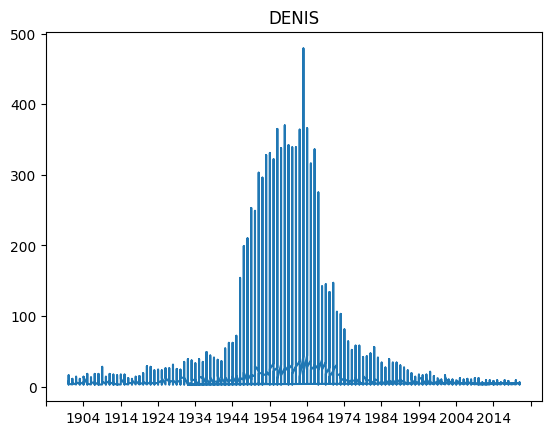

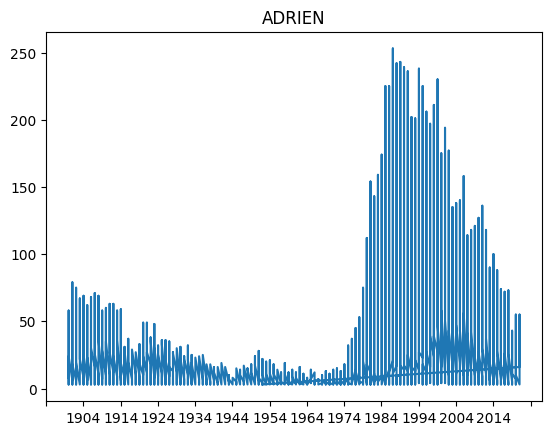

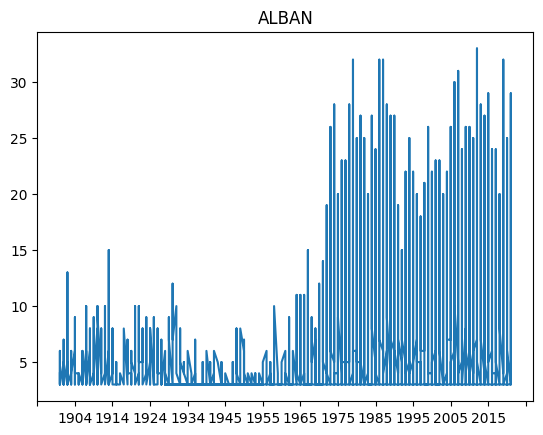

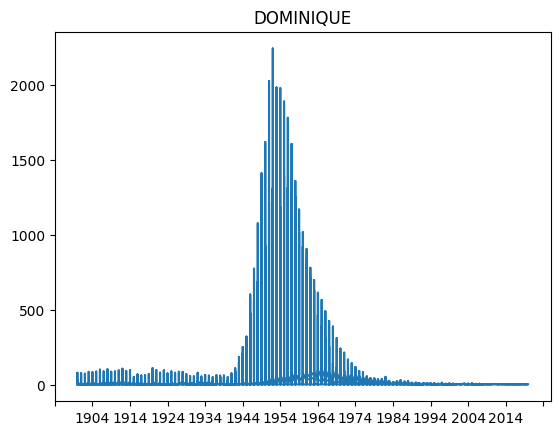

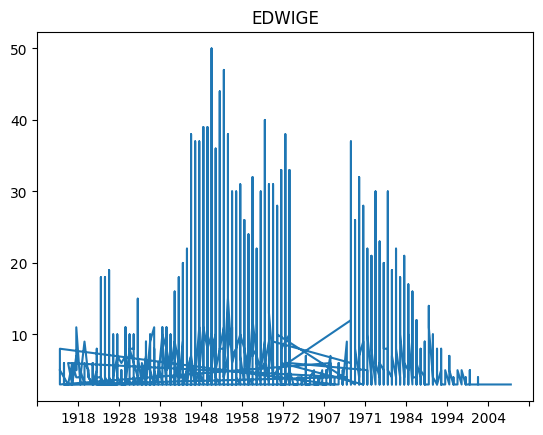

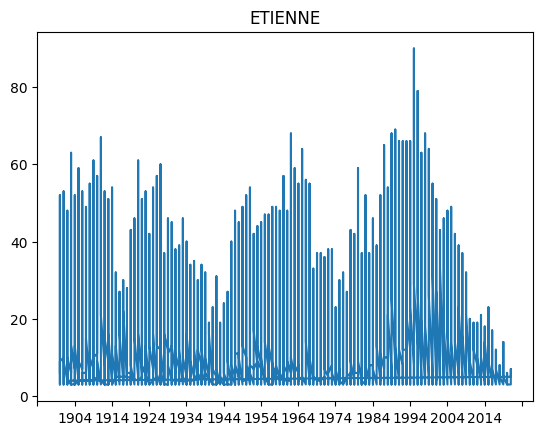

In [4]:
names = ['DENIS', 'ADRIEN', 'ALBAN', 'DOMINIQUE', 'EDWIGE', 'ETIENNE']
for n in names:
    name = df[(df.preusuel == n) & (df.annais != 'XXXX')]
    x = name['annais']
    y = name['nombre']

    fig, ax = plt.subplots()
    ax.plot(x,y)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 10))
    plt.title(n)
    plt.show()

We notice that some names are only popular for a while like DOMINIQUE from 1944 to 1974. But names like ETIENNE get popular and unpopular repeatedly overtime.

## Establish by gender the most given firstname by year. Analyse the evolution of the most frequent firstname.

In [5]:
# defining functions cell
def most_given_name_that_year(data, year):
    names_that_year = data.loc[ (data['annais'] == str(year)) ]
    names_that_year = names_that_year[names_that_year['nombre']==names_that_year['nombre'].max()]
    return (names_that_year['preusuel'].unique()[0], year, names_that_year['nombre'].max())

def most_give_names_all_years(data):
    x = []
    y = []
    for year in data.loc[data['annais'] != 'XXXX'].annais.unique():
        (x1,y1, c) = most_given_name_that_year(data, year)
        x += [x1]
        y += [int(y1)]
    return (x,y,c)

def gender_frequecy(data, gender):
    (name, year, nombre) = most_give_names_all_years(data.loc[data['sexe'] == gender])
    my_dict = {'name': name, 'year': year, 'nombre': nombre}
    sexe_df = pd.DataFrame(my_dict)
    return sexe_df

In [6]:
male_df = gender_frequecy(df, 1)
female_df = gender_frequecy(df, 2)

In [7]:
male_df

,name,year,nombre
0,ANDRÉ,1900,1943
1,MARCEL,1901,1943
2,GEORGES,1902,1943
3,ANDRÉ,1903,1943
4,ANDRÉ,1904,1943
...,...,...,...
117,_PRENOMS_RARES,2017,1943
118,_PRENOMS_RARES,2018,1943
119,_PRENOMS_RARES,2019,1943
120,_PRENOMS_RARES,2020,1943


In [8]:
female_df

,name,year,nombre
0,MARIE,1900,1844
1,MARIE,1901,1844
2,MARIE,1902,1844
3,MARIE,1903,1844
4,MARIE,1904,1844
...,...,...,...
117,_PRENOMS_RARES,2017,1844
118,_PRENOMS_RARES,2018,1844
119,_PRENOMS_RARES,2019,1844
120,_PRENOMS_RARES,2020,1844


We notice by looking at the evolution of the first names of both genders, that more traditional names like Georges and Marie were popular in the 1900s. Whereas, nowadays we notice that PRENOMS_RARES are more popular. This shows that unusual and truly unique names are becoming far more common – and the trend reflects some profound shifts in our culture.

## Optional : Which department has a larger variety of names along time ? Is there some sort of geographical correlation with the data?

In [9]:
# defining functions cell
def variety_dpt(data):
    dp_arrays = data.groupby('dpt').preusuel.apply(list).reset_index()
    count = -1
    dep = -1
    for department in data.dpt.unique():
        x = np.array(dp_arrays.loc[df['dpt'] == department]['preusuel'])
        if (len(x)>0):
            variety = len(np.unique(x)[0])
            if (count <= variety):
                count = variety
                dep = department
    return (dep, count)

In [10]:
variety_dpt(df)

('973', 129166)

<b>After reading about the history of department number 973:</b>

L'histoire de la Guyane française est complexe et partiellement connue. Les premiers occupants de ce territoire sont amérindiens. À partir de l'arrivée des colons européens et de leurs esclaves africains, elle s'intègre dans l'histoire de France, francophone et panafricaine et de l'Amérique du Sud. La pluralité linguistique encore présente atteste de cette diversité et ancre sa place dans le monde créole depuis plus d'un siècle. <a href="https://fr.wikipedia.org/wiki/Histoire_de_la_Guyane">Reference</a>

<b>It comes as no shock that this department has the most name varieties because it was colonised by so many countries, hence introducing countless cultures and name varieties over the years. </b>